In [1]:
from spacemathpy import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

In [8]:
SM = HiggsCouplings()
SM.model = 'SM Higgs couplings'
SM.ghtt = lambda tipo: mt[tipo]/(SMvev[tipo])
SM.ghbb = lambda tipo: mb[tipo]/(SMvev[tipo])
SM.ghtautau = lambda tipo: mtau[tipo]/(SMvev[tipo])
SM.ghWW = lambda tipo: g[tipo]*mW[tipo]
SM.ghZZ = lambda tipo: g[tipo]*mZ[tipo]/cW[tipo]

In [4]:
mhiggs = mh['value']#np.linspace(100,1000,1000)

v ='value'
Whtt = WidthHff(SM.ghtt(v),1,mt[v],mt[v],mhiggs)
Whtt = np.nan_to_num(Whtt)
Whww = WidthHWW(SM.ghWW(v),mhiggs)
Whww = np.nan_to_num(Whww)
Whzz = WidthHZZ(SM.ghZZ(v),mhiggs)
Whzz = np.nan_to_num(Whzz)

totw = (WidthHgg(SM.ghtt(v),SM.ghbb(v),mhiggs) + 
       WidthHff(SM.ghtautau(v),1,mtau[v],mtau[v],mhiggs) + 
       Whtt + 
       WidthHff(SM.ghbb(v),3,mb[v],mb[v],mhiggs) + 
       Whww + 
       Whzz)
totw

0.02169982765227521

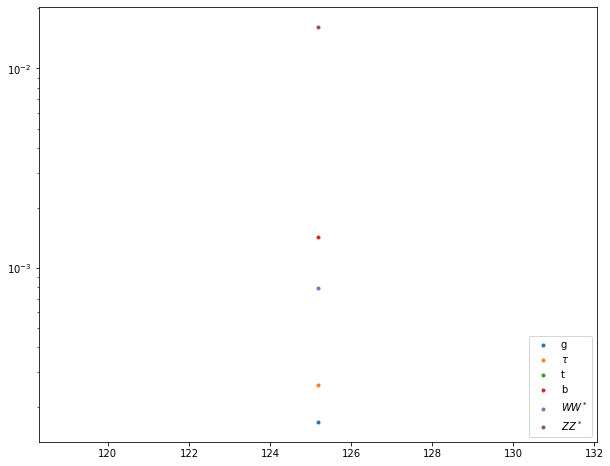

In [5]:
fig = plt.figure(figsize=(10,8))
plt.semilogy(mhiggs,WidthHgg(SM.ghtt(v),SM.ghbb(v),mhiggs),'.',label='g')
plt.semilogy(mhiggs,WidthHff(SM.ghtautau(v),1,mtau[v],mtau[v],mhiggs),'.',label=r'$\tau$')
plt.semilogy(mhiggs,Whtt,'.',label='t')
plt.semilogy(mhiggs,WidthHff(SM.ghbb(v),1,mb[v],mb[v],mhiggs),'.',label='b')
plt.semilogy(mhiggs,Whww,'.',label='$W W^*$')
plt.semilogy(mhiggs,Whzz,'.',label='$Z Z^*$')
#plt.grid()
plt.legend(loc='lower right')
plt.show()

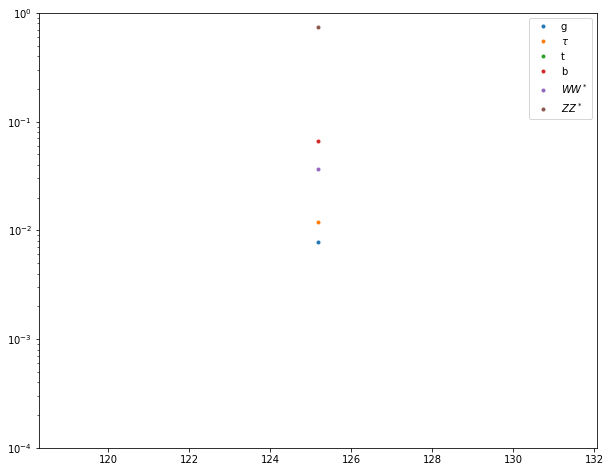

In [7]:
fig = plt.figure(figsize=(10,8))
plt.semilogy(mhiggs,WidthHgg(SM.ghtt(v),SM.ghbb(v),mhiggs)/totw,'.',label='g')
plt.semilogy(mhiggs,WidthHff(SM.ghtautau(v),1,mtau['value'],mtau['value'],mhiggs)/totw,'.',label=r'$\tau$')
plt.semilogy(mhiggs,Whtt/totw,'.',label='t')
plt.semilogy(mhiggs,WidthHff(SM.ghbb(v),1,mb['value'],mb['value'],mhiggs)/totw,'.',label='b')
plt.semilogy(mhiggs,Whww/totw,'.',label='$W W^*$')
plt.semilogy(mhiggs,Whzz/totw,'.',label='$Z Z^*$')
plt.ylim((1e-4,1))
plt.legend()